<a href="https://colab.research.google.com/github/pranay8297/deep-learning-projects/blob/master/EAI6010_PranayBindela_Week5_SpringTerm_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EAI6010_PranayBindela_Week5_SpringTerm_2022**
##Course: EAI6010 - Applications Of Artifcial Int
##Professor: Vladimir Shapiro Date: May 12, 2022

# Introduction

1 - search algos

### Search Algorithms
There are 2 types of search algorithms, informed and un informed search algorithms. The primary difference between both of them is informed search algorithms have entire map in hand, where as uninformed does not. There are different types of search alogrithms, for this assignment, I chose to implement A-Start informed search algorithm 

### What is A-Star search algorithm
A-Star search algorithm is one of the informed search algorithms, where it uses 2 metrics named **h** and **g**. Here **h** denotes the distance covered till now to traverse from starting point to any node and **g** metric is a hurestic function which is generally euclidean distance from current node to the destination node. In each step, we chose to traverse to the node which has least **f (h + g)** value [1]

### Why A-Star
A-Star search algorithm always gaurentees the shortest path if path exists.

# Analysis Section

In [153]:
# from ipdb import set_trace as st
from copy import deepcopy
import math
from matplotlib import pyplot
import matplotlib.patches as mpatches
import numpy as np
import random

###1. Implementation of A-Star search algorithm

**Node**: This is a class which stores coordinates and metrics of each position in the grid

In [154]:
class Node:

  def __init__(self, x, y, c8 = False):
    self.x = x 
    self.y = y
    self.f = 0
    self.g = 0
    self.h = 0
    self.neighbors = []
    self.previous = None
    self.obstacle = False
    self.eight_connectivity = True if c8 else False

  def add_neighbors(self,grid, columns, rows):

    neighbor_x = self.x
    neighbor_y = self.y

    if neighbor_x < columns - 1:
        self.neighbors.append(grid[neighbor_x+1][neighbor_y])
    if neighbor_x > 0:
        self.neighbors.append(grid[neighbor_x-1][neighbor_y])
    if neighbor_y < rows -1:
        self.neighbors.append(grid[neighbor_x][neighbor_y +1])
    if neighbor_y > 0: 
        self.neighbors.append(grid[neighbor_x][neighbor_y-1])
    if self.eight_connectivity:
      if neighbor_x > 0 and neighbor_y > 0:
          self.neighbors.append(grid[neighbor_x-1][neighbor_y-1])
      if neighbor_x < columns -1 and neighbor_y > 0:
          self.neighbors.append(grid[neighbor_x+1][neighbor_y-1])
      if neighbor_x > 0 and neighbor_y <rows -1:
          self.neighbors.append(grid[neighbor_x-1][neighbor_y+1])
      if neighbor_x < columns -1 and neighbor_y < rows -1:
          self.neighbors.append(grid[neighbor_x+1][neighbor_y+1])

**AStar**: This class has all the mothods to create either 8 connectivity or 4 connectivity grids, and find the shortest path between start and end points implementing A-Star search algorithm [1]

**find_path**: This function intantiate AStar object and calls main function to find shortest path

In [155]:
class AStar:

    def __init__(self, grid, start, end, c8 = False):
        
        self.mgrid = grid
        self.cols = len(grid)
        self.rows = len(grid[0])
        self.start = start
        self.end = end
        self.c8 = c8

    def clean_open_set(self, open_set, current_node):

        for i in range(len(open_set)):
            if open_set[i] == current_node:
                open_set.pop(i)
                break

        return open_set

    def h_score(self, current_node, end):
        # euclidean distane as hurestic function
        distance = math.sqrt((current_node.x - end.x)**2 + (current_node.y - end.y)**2)
        return distance

    def fill_grids(self, grid, cols, rows):

        for i in range(cols):
            for j in range(rows):
                
                present_val = grid[i][j]
                grid[i][j] = Node(i, j, self.c8)

                if present_val != 0:
                    grid[i][j].obstacle = True

        return grid

    def get_neighbors(self, grid, cols, rows):
        for i in range(cols):
            for j in range(rows):
                grid[i][j].add_neighbors(grid, cols, rows)
        return grid
    
    def start_path(self, open_set, closed_set, current_node, end):

        best_way = 0
        for i in range(len(open_set)):
            if open_set[i].f < open_set[best_way].f:
                best_way = i

        current_node = open_set.pop(best_way)
        final_path = []
        if current_node == end:
            temp = current_node
            final_path = [current_node]
            while temp.previous:
                final_path.append(temp.previous)
                temp = temp.previous

        open_set = self.clean_open_set(open_set, current_node)
        closed_set.append(current_node)
        neighbors = current_node.neighbors
        for neighbor in neighbors:
            if (neighbor in closed_set) or (neighbor.obstacle == True):
                continue
            else:
                temp_g = current_node.g + 1
                skip_flag = False
                for k in range(len(open_set)):
                    if neighbor.x == open_set[k].x and neighbor.y == open_set[k].y:
                        if temp_g < open_set[k].g:
                            open_set[k].g = temp_g
                            open_set[k].h= self.h_score(open_set[k], end)
                            open_set[k].f = open_set[k].g + open_set[k].h
                            open_set[k].previous = current_node
                        else:
                            pass
                        skip_flag = True
  
                if skip_flag:
                    pass
                else:
                    neighbor.g = temp_g
                    neighbor.h = self.h_score(neighbor, end)
                    neighbor.f = neighbor.g + neighbor.h
                    neighbor.previous = current_node
                    open_set.append(neighbor)


        return open_set, closed_set, current_node, final_path

    def main(self):
        grid = self.mgrid
        grid = self.fill_grids(grid, self.cols, self.rows)
        grid = self.get_neighbors(grid, self.cols, self.rows)
        open_set  = []
        closed_set  = []
        current_node = None
        final_path  = []
        open_set.append(grid[self.start[0]][self.start[1]])
        self.end = grid[self.end[0]][self.end[1]]
        while len(open_set) > 0:
            open_set, closed_set, current_node, final_path = self.start_path(open_set, closed_set, current_node, self.end)
            if len(final_path) > 0:
                break

        return final_path
 
def find_path(grid, start, end, c8 = False):

  a_star = AStar(grid, start, end, c8)
  final_path = a_star.main()
  if len(final_path) > 0:
      return 1, final_path
  return -1, []

###2. Visualizing the map with path

Here in this notebook, I used *matplotlib.pyplot* to show the grid and path

In [156]:
def show_map(grid, values = {0: 'open', 1: 'closed', 2: 'path'}):
  pyplot.figure(figsize=(5,5))
  im = pyplot.imshow(grid)
  colors = {value: im.cmap(im.norm(value)) for value in values}
  patches = [ mpatches.Patch(color = colors[i], label = str(values[i])) for i in values]

  pyplot.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0. )
  pyplot.show()

def show_path(grid, path, values = {0: 'open', 1: 'closed', 2: 'path', 3: 'start-end'}):
  print('Path Found')
  for node in path:
    grid[node.x][node.y] = 2

  grid[path[-1].x][path[-1].y] = 3
  grid[path[0].x][path[0].y] = 3
  show_map(grid, values)
  print(f"fig - path from {(path[-1].x, path[-1].y)} and {(path[0].x, path[0].y)}")
  print(f'Length of path is : {len(path)}')

In [157]:
def find_path_and_show_map(grid, start, end, c8 = False):
  status, path = find_path(deepcopy(grid), start, end, c8 = c8)

  if c8:
    print('8 connectivity grid')
  else:
    print('4 connectivity grid')


  if (status == 1):
    show_path(grid, path)
  else:
    print(f'No path found between {start} and {end}')

    grid[start[0]][start[1]] = 3
    grid[end[0]][end[1]] = 3
    show_map(grid, {0: 'open', 1: 'closed', 3: 'start-end'})
    

An example 4 connectivity grid

4 connectivity grid
Path Found


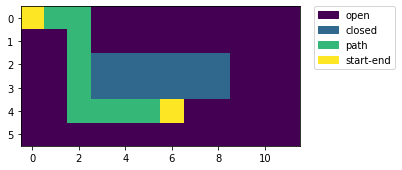

fig - path from (0, 0) and (4, 6)
Length of path is : 11


In [158]:
main_grid = [
        [0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,1,1,1,1,1,1,0,0,0],
        [0,0,0,1,1,1,1,1,1,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0],
]
start = [0, 0]
end = [4,6]

find_path_and_show_map(deepcopy(main_grid), start, end, c8 = False)

###3. Implementation of same above grid with same start and end points with 8 connectivity

8 connectivity grid
Path Found


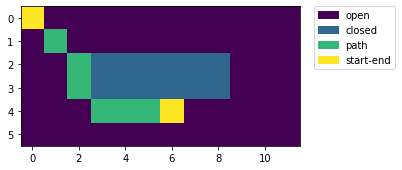

fig - path from (0, 0) and (4, 6)
Length of path is : 8


In [159]:
find_path_and_show_map(deepcopy(main_grid), start, end, c8 = True)

If we observe the results, the length reduced from 11 to 8 when we changed the grid from 4 connectivity to 8 connectivity

###4. Implementation of search algorithm with random grids, start and end points

A function to generate a random grids

In [160]:
# Randomized generation of grid
def get_random_grid(rows = 6, cols = 12):
  return np.random.choice([0, 1], size=(6,12), p=[2/3, 1/3]).tolist()

Required helper functions to generate random open start and end points

In [161]:
# Get random start and end points
def get_random_open_point_from_grid(grid):
  nrows = len(grid)
  ncol = len(grid[0])

  while True:
    r,c = random.randint(0, nrows - 1), random.randint(0, ncol - 1)
    if (grid[r][c]) == 0:
      return (r, c)

def get_random_start_and_end_point(grid):
  start = get_random_open_point_from_grid(grid)

  while True:
    end = get_random_open_point_from_grid(grid)
    if (end != start):
      return start, end

A function which generates random grid, start and end points with randomized connectivity, finds path and display the grid

In [162]:
# automated process of getting a grid, start, end and finding path
def get_grid_find_path():
  grid = get_random_grid()
  start, end = get_random_start_and_end_point(grid)

  # get random c8
  x = random.randint(0, 1000)
  c8 = True if (x%2 == 0) else False
  
  find_path_and_show_map(deepcopy(grid), start, end, c8 = c8)

3 attempts 

iter - 1
8 connectivity grid
Path Found


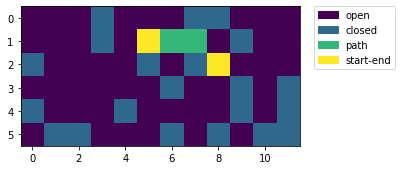

fig - path from (2, 8) and (1, 5)
Length of path is : 4


iter - 2
8 connectivity grid
Path Found


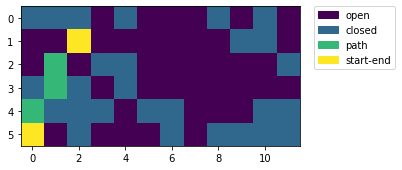

fig - path from (1, 2) and (5, 0)
Length of path is : 5


iter - 3
8 connectivity grid
Path Found


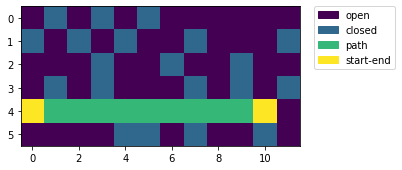

fig - path from (4, 0) and (4, 10)
Length of path is : 11




In [163]:
for i in range(3):
  print(f'iter - {i+1}')
  get_grid_find_path()
  print('\n')

### 5. Reflect on results

From the above exercise, there are few takeaways. Primarily, the length of path in 8 connectivity grid is significantly small when compared to 4 connectivity one. 

The statement of "A-Star search algorithm always finds the shortest route if a route exist" is validated 


# Conclusion

In the above notebook, we have succesfully implemented A-Star search algorithm with euclidean distance as Hurestic function. We also found the difference between informed search and uninformed search algorithms

# References

1. Akdogan, A. (2021, July 16). Understanding A* Path Algorithms and Implementation with Python. Medium. https://towardsdatascience.com/understanding-a-path-algorithms-and-implementation-with-python-4d8458d6ccc7

